# SageMath ❤



O código abaixo fará com que nossas saídas fiquem mais bonitas

In [227]:
%display latex

## SageMath (aka Python com esteróides)

Basicamente, o SageMath é um interpretador da linguagem Python com várias bibliotecas incluídas por padrão no namespace global. Se você sabe Python, então você sabe a sintaxe de SageMath (estruturas dede controle de fluxo, repetição, chamada de função e etc). Então, a única coisa que você precisa fazer para ficar fluente em SageMath é se familiarizar com a biblioteca de funções disponível. 

Ao longo desse texto, vou assumir que você é fluente em Python.

## Básico

### Constantes

In [230]:
pi # π
infinity # ∞
oo # ∞
golden_ratio # Φ
e # e
i # i
I # i
log2 # log(2)
NaN # Not a Number

NaN

### Funções elementares


In [231]:
# sin(2) - seno
# cos(2) - cosseno
# tan(2) - tangente
# sec(2) - secante
log(8, 2) # log_2(8) = 3
# ln(2) - logaritmo natural
# exp(2) # e^2
# sqrt(2) # √2

3

### Declarando variáveis

Para realizarmos manipulações simbólicas, precisamos declarar as variáveis algébricas envolvidas. 


In [235]:
y = var('y')
z, k = var('z, k') # declarando mais de uma variável ao mesmo tempo

### Operadores Elementares


In [236]:
x, y = var("x, y")
x + y # + para adição
x - y # - para subtração
x * y # * para multiplicação
x / y # / para divisão

# 🚨 ^ para exponenêciação. 
# Note que a sintaxe aqui é diferente da utilizada no Python.
# Entretanto, a exponênciação do python x ** y tbm funciona, mas
# seu uso é desencorajado por questão de estilo.
x^y   

x^y

### Declarando uma  função

Vamos explorar a função algébrica $$f(x) = x^2 \sin 2x + x^2e^{-x}+x^2 - x + 3.$$

In [242]:
f(x) = x^2 * sin(2*x) + x^2*exp(-x) + x^2 - x + 3

⚠ **Alerta:** Como disse anteriormente, o SageMath é apenas um interpretador Python com uma biblioteca adicional de funções no *namespace* global. Isso significa que todo programa Python é um programa válido de SageMath (possuem a mesma sintaxe). Consequentemente, o código abaixo define uma função válida:

```python
def f(x):
    return x^2 * sin(2*x) + x^2*exp(-x) + x^2 - x + 3
```

No entando a natureza dessa função é diferente da função algébrica que definimos anteriormente. 
A função algébrica $f$ definida como

```python
f(x) = x^2 \sin 2x + x^2e^{-x}+x^2 - x + 3.
```

é um objeto do tipo `<𝚌𝚕𝚊𝚜𝚜 '𝚜𝚊𝚐𝚎.𝚜𝚢𝚖𝚋𝚘𝚕𝚒𝚌.𝚎𝚡𝚙𝚛𝚎𝚜𝚜𝚒𝚘𝚗.𝙴𝚡𝚙𝚛𝚎𝚜𝚜𝚒𝚘𝚗'>`, que o SageMath será capaz de manipular (calcular limite, simplificar, integrar e etc). Já a função $f$ definida com `def f(x)` é uma função da linguagem Python que possui tipo `<class 'function>`.
O SageMath não é capaz de manipular funções do Python.

### Visualizando

Você pode visualizar f  na forma de um texto:

In [243]:
f

x |--> x^2*e^(-x) + x^2*sin(2*x) + x^2 - x + 3

ou

In [252]:
show(f)

x |--> x^2*e^(-x) + x^2*sin(2*x) + x^2 - x + 3

Você deveria ser capaz de visualizar a função $f$ como na figura abaixo.

![formula](./figs/formula.png)

Outra forma é exibir a descrição da função em [$\LaTeX$](https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes).

In [251]:
print(latex(f))

x \ {\mapsto}\ x^{2} e^{\left(-x\right)} + x^{2} \sin\left(2 \, x\right) + x^{2} - x + 3


Tudo o que foi discutido acima para uma função $f$ também aplica-se a expressões. 

In [253]:
expr = 1/(z + 1)
expr

1/(z + 1)

### Plotando $f$

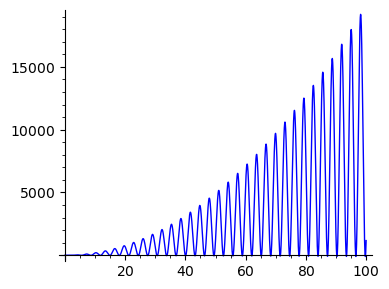

In [281]:
# o primeiro parâmetro define o início do intervalo a ser plotado e o segundo, o final do intervalo.
# figsize controla o tamanho da imagem
f.plot(0, 100, figsize=4) 

Esteja ciente de definir um intervalo adequado. Veja como o resultado muda quando mudamos o intervalo.

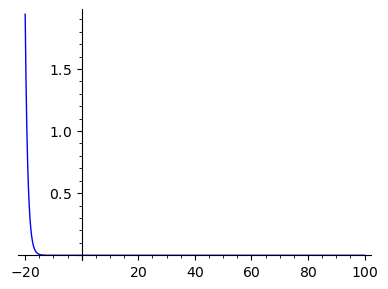

In [266]:
f.plot(-20, 100, figsize=4)

<img src="./figs/wait.gif" style="width:300px; height:200px;">

Se você é um leitor atento, pode ter observado que os dois gráficos anteriores da mesma função não estão coerentes. Essa inconsistência ocorre devido a um antigo BUG presente no SageMath, que impede a exibição correta do multiplicador na notação científica. Para contornar esse problema, basta pedir para o SageMath desenhar um *frame* ao redor do plot.

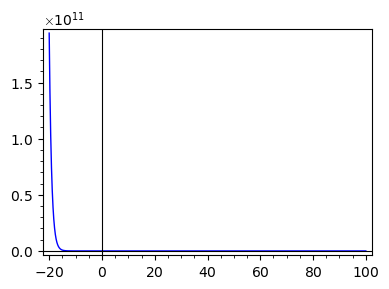

In [267]:
f.plot(-20, 100, frame=True, figsize=4)

### Plotando mais de uma função no mesmo gráfico


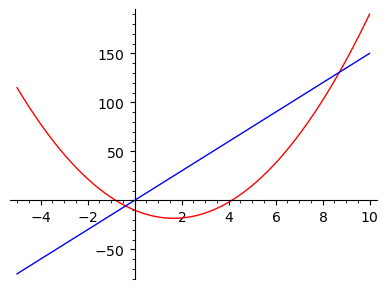

In [284]:
f(x) = 3 * x^2 - 10*x - 10
g(x) = 15*x

P = f.plot(-5, 10, color="red") + g.plot(-5, 10)
P.show(figsize=4)

## Plotando mais de um gráfico

Veja um exemplo na Seção [Sistema de (In)equações](#Sistema-de-(In)equações)

### Manipulando expressões

Expandir expressões 

In [285]:
expr = (x-y)^5
expand(expr)

x^5 - 5*x^4*y + 10*x^3*y^2 - 10*x^2*y^3 + 5*x*y^4 - y^5

Simplificação de expressões

In [286]:
expr = sin(x/(x^2 + x))
expr

sin(x/(x^2 + x))

In [287]:
expr.simplify_full()

sin(1/(x + 1))

## Plotando uma função que recebe mais de uma variável



In [1]:
def f(x,y):

    return math.sin(y^2 + x^2)/math.sqrt(x^2 + y^2 + 0.0001)

P = plot3d(f, (-3, 3),(-3, 3), adaptive=True, color=rainbow(60, 'rgbtuple'), max_bend=.1, max_depth=15)

P.show()

Graphics3d Object

# Limite

In [292]:
# as 4 formas abaixo são todas equivalentes
f.limit(x = +infinity)
lim(f, x = +infinity)
lim(f, x = +oo)
limit(f, x = +infinity)

x |--> +Infinity

Outro exemplo

In [293]:
lim((x+1)^(1/x), x=0)

e

Podemos pegar pegar o valor numérico de uma expressão como `.n()`

In [294]:
lim((x+1)^(1/x), x=0).n()

2.71828182845905

Podemos calcular limite da direita (+) e da esquerda (-)

In [295]:
lim(x*log(x), x=0, dir='+')

0

# Derivada

In [296]:
# Todas as formas abaixo são equivalentes
f.diff()
diff(f)
derivative(f)
f.derivative()

x |--> 6*x - 10

# Integral

### Integral indefinida

In [297]:
integ = f.integral(x)
integ

x |--> x^3 - 5*x^2 - 10*x

### Integral definida

In [300]:
# As declarações a seguir são equivalentes
f.integral(x, 0, 1)
integral(f, x, 0, 1)

-14

Acessando o valor numérico

In [301]:
integral(f, x, 0, 1).n()

-14.0000000000000

# Somatório

In [302]:
n,k = var('n,k')

# vamos usar o parâmetro hold=True para que o somatório não seja avaliado
# imediatamente e que assim possamos conferí-lo
sum1 = sum(k,k,1,n, hold=True)
sum1

sum(k, k, 1, n)

In [303]:
sum1.unhold()

1/2*n^2 + 1/2*n

Agora lado a lado

In [304]:
show(sum1 == sum1.unhold())


sum(k, k, 1, n) == 1/2*n^2 + 1/2*n

Outro exemplo

In [305]:
n,k = var('n,k')
soln_d = sum(k^4 * 4^k / binomial(2*k,k), k, 0, n, hold=True)
show(soln_d == soln_d.unhold())


sum(4^k*k^4/binomial(2*k, k), k, 0, n) == 2/693*((63*n^5 + 175*n^4 + 130*n^3 - 4*n^2 - 19*n + 3)*4^n - 3*binomial(2*n, n))/binomial(2*n, n)

Um último exemplo

In [306]:
n = var('n')
f(n) = 1/factorial(n)

soln = sum(f(n), n, 0, oo, hold=True) 
show(soln)

print("Esta é a solução: ")
show(soln.unhold())

print("Está é a aproximação numérica: ")
show(soln.unhold().n())

sum(1/factorial(n), n, 0, +Infinity)

Esta é a solução: 


e

Está é a aproximação numérica: 


2.71828182845905

Agora é o último, eu juro!

In [307]:
n = var('n')
f = (16*n^2 + 20*n + 7) / factorial(4*n + 2)
soln = sum(f,n,0,oo, hold=True) 
show(soln)

print("Solução exata: ")
show(soln.unhold())

print("Solução aproximada: ")
show(soln.unhold().n())

sum((16*n^2 + 20*n + 7)/factorial(4*n + 2), n, 0, +Infinity)

Solução exata: 


1/113400*hypergeometric((), (13/4, 11/4, 7/2), 1/256) + 1/20*hypergeometric((), (9/4, 7/4, 5/2), 1/256) + 7/2*hypergeometric((), (5/4, 3/4, 3/2), 1/256)

Solução aproximada: 


3.55975281326694

# (In)Equações


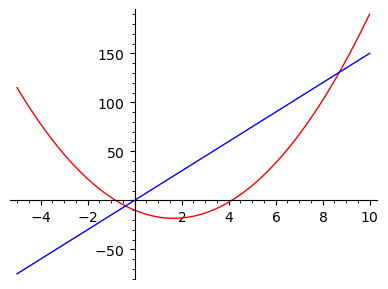

In [308]:
f(x) = 3 * x^2 - 10*x - 10
g(x) = 15*x

P = f.plot(-5, 10, color="red") + g.plot(-5, 10)
P.show(figsize=4)

In [309]:
solve(f == g, x)

[x == -1/6*sqrt(745) + 25/6, x == 1/6*sqrt(745) + 25/6]

In [310]:
solve(f >= g, x)

[[x <= -1/6*sqrt(745) + 25/6], [x >= 1/6*sqrt(745) + 25/6]]

podemos colocar hipóteses sobre nossa variável

In [311]:
assume(x >= 0)

Podemos ver nossas hipóteses com o comando

In [312]:
assumptions()

[x >= 0]

Veja como o resultado da nossa equação mudou! (Nos meus testes, a função `assume()` não funcionou para inequações).


In [313]:
solve(f == g, x)

[x == 1/6*sqrt(745) + 25/6]

Para limpar as hipóteses, faça

In [314]:
forget()

Veja como as hipóteses foram eliminadas

In [315]:
assumptions()

[]

Outro exemplo

In [317]:
k, z = var("k, z")
assume(k, 'integer')
assume(z, 'integer')
solve((k-z)^2==2, k)

[]

# Encontrando raízes

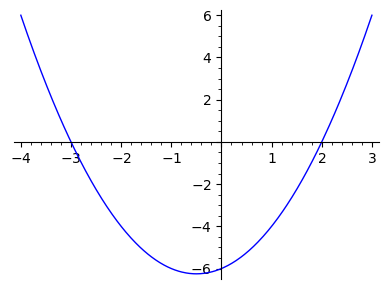

In [318]:
f(x) = x^2 + x - 6
f.plot(-4, 3, figsize=4)

In [319]:
sol = solve(f(x) == 0, x)
show(sol)

[x == -3, x == 2]

Encontrando uma raiz no intervalo $[-4, -2]$

In [320]:
find_root(f, -4, -2)

-3.0

# Sistema de (In)equações

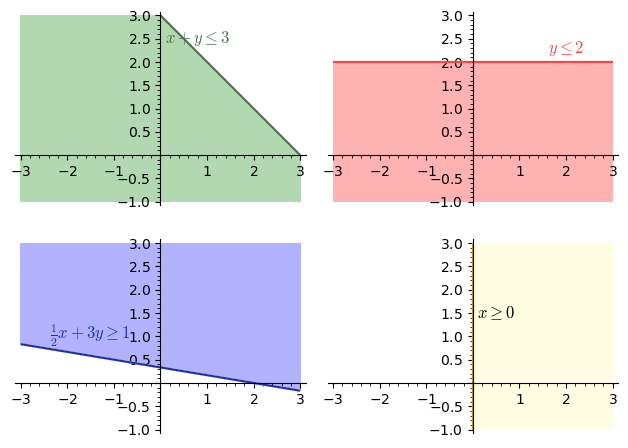

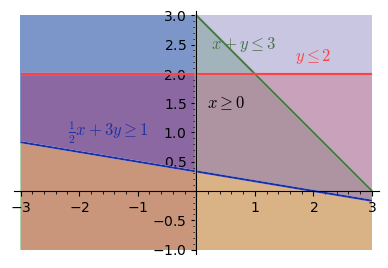

In [321]:
ineq1l = text(r"$x + y \leq 3$", (0.8, 2.5), color='#467347', fontsize=12).plot()
ineq1r = region_plot(x + y <= 3, (x, -3, 3), (y, -1, 3), incol='green', bordercol='#467347', alpha=0.3).plot()

ineq2l = text(r"$y \leq 2$", (2, 2.3), color='#f94346', fontsize=12).plot()
ineq2r = region_plot(y <= 2, (x, -3, 3), (y, -1, 3), incol='red', bordercol='#f94346', alpha=0.3).plot()

ineq3l = text(r"$\frac{1}{2}x + 3y \geq 1$", (-1.5, 1), color='#1e30a1', fontsize=12).plot()
ineq3r = region_plot(0.5*x + 3*y >= 1, (x, -3, 3), (y, -1, 3), incol='blue', bordercol='#1e30a1',  alpha=0.3).plot()


ineq4l = text(r"$x \geq 0$", (.5, 1.5), color='black', fontsize=12).plot()
ineq4r = region_plot(x >= 0, (x, -3, 3), (y, -1, 3), incol='#fff79d', bordercol='#c99e00',  alpha=0.3).plot()

graphics_array(((ineq1r + ineq1l, ineq2r + ineq2l), 
                (ineq3r + ineq3l, ineq4r + ineq4l))).show()

plot(ineq1r + ineq1l + ineq2r + ineq2l + ineq3r + ineq3l + ineq4r + ineq4l).show(figsize=4)


In [322]:
show(solve([x + y <= 3, y <= 2, 1/2*x + 3*y >= 1, x >= 0], x, y))

[[max(0, -6*y + 2) < x, x < -y + 3, (-1/5) < y, y < 2], [x == 0, (1/3) < y, y < 2], [x == 0, y == (1/3)], [x == 0, y == 2], [x == 1, y == 2], [x == (16/5), y == (-1/5)], [x == -6*y + 2, (-1/5) < y, y < (1/3)], [x == -y + 3, (-1/5) < y, y < 2], [y == 2, 0 < x, x < 1]]



# Mais informações 📖

- https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/expression.html
- https://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html
- https://grossack.site/2021/02/25/sage-sums.html